# Should We Move On From The Snyderverse?
### Ever Nolasco
#### 6 April 2021

For the past 3 or so years, there has been this Warner Bros./DC drama lurking around in the film world called the "Release the Snyder Cut" movement. This movement originated back in November of 2017 when <b>Justice League</b>, the 5th film in the DC Extended Universe, or DCEU for short, was released theatrically. Upon viewing, DC fans, notably Zack Snyder fans, noticed a complete shift in the film's tone and style when compared to Snyder's previous work. To add insult to injury, a good chunk of the scenes shown in promotional material was nowhere to be found in the final cut of the movie. This caused a skepticism among the Zack Snyder fan community and left them wondering what exactly happened behind the scenes on the set of the film. Surely this couldn't be what Zack Snyder had intended to release when he was assigned to the project. Thus, "Release the Snyder Cut" was born.

Fast forward to May of 2020, after years of campaigning and raising money to bring awareness to the movement, Zack Snyder fans' hardwork had finally paid off. HBO Max, Warner Bros.' brand new streaming service at the time, and their answer to Netflix, Hulu, Disney+, Amazon Prime, etc., announced that they would be releasing Zack Snyder's true vision of <b>Justice League</b> on their platform. Initial budget estimates for completion of Snyder's version of the film were around \\$30 million, but when it was all said and done, Warner Bros. ended up having to put up around $70 million to finish the movie.

Fast forward again to March of 2021, <b>Zack Snyder's Justice League</b> was released to the masses on HBO Max. It recieved critic and audience praise, garnering a 73% rating on Rotten Tomatoes. Fans, especially those who participated in the "Release the Snyder Cut" movement, were awed with the 4 hour epic, but they were not satisfied. Since the film's release, a new movement has begun to emerge: Restore the Snyderverse. It seems as though Snyder fans have switched their stance, from clamoring for Snyder's unfinished <b>Justice League</b> film to now campaigning for Snyder to finish his original vision for the DCEU as a whole. Warner Bros. themselves have said that they have no plans to continue with Snyder's DC films universe, but judging from the past, we can assume that Snyder fans will not take no for an answer and will continue to press the studio any way they can.

That being said, the following is my analysis on whether or not Warner Bros. should revive the Snyder era of DC films or move on.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [27]:
#Import the dataset I will be using
dc_films = pd.read_csv("data/DC_Films.csv")

As we can see below, the chart presents all 10 DC films released so far since the beginning of the DCEU and their worldwide box office numbers, opening weekend numbers, Rotten Tomatoes rating, and relationship to the Snyderverse. I am defining Snyderverse as movies that were made and released while Snyder still had control over the DC films.

In [28]:
dc_films

,Movie,Worldwide,Opening Weekend,Rotten tomatoes,Snyderverse
0,Man of Steel,668045518,116619362,56,Yes
1,Batman v Superman: Dawn of Justice,873637528,166007347,29,Yes
2,Suicide Squad,746846894,133682248,26,Yes
3,Wonder Woman,822303505,103251471,93,Yes
4,Justice League (2017),657926987,93842239,40,NaN
5,Aquaman,1148485886,67873522,65,No
6,Shazam!,365971656,53505326,90,No
7,Joker,1074251311,96202337,68,No
8,Birds of Prey,201858461,33010017,78,No
9,Wonder Woman 1984,0,0,59,No


In [29]:
#move the columns into arrays that I will use for analysis
movies = dc_films['Movie']
ww = dc_films['Worldwide']
ow = dc_films['Opening Weekend']
rt = dc_films['Rotten tomatoes']
sv = dc_films['Snyderverse']

#Now I will create 2D arrays to hold table data
row_count = len(dc_films)
films_arr = []

for x in range(row_count):
    films_arr.append([movies[x], ww[x], ow[x], rt[x], sv[x]])

In [30]:
films_arr

[['Man of Steel', 668045518, 116619362, 56, 'Yes'],
 ['Batman v Superman: Dawn of Justice', 873637528, 166007347, 29, 'Yes'],
 ['Suicide Squad', 746846894, 133682248, 26, 'Yes'],
 ['Wonder Woman', 822303505, 103251471, 93, 'Yes'],
 ['Justice League (2017)', 657926987, 93842239, 40, nan],
 ['Aquaman', 1148485886, 67873522, 65, 'No'],
 ['Shazam!', 365971656, 53505326, 90, 'No'],
 ['Joker', 1074251311, 96202337, 68, 'No'],
 ['Birds of Prey', 201858461, 33010017, 78, 'No'],
 ['Wonder Woman 1984', 0, 0, 59, 'No']]

Now that we have our 2 dimensional array, we can use it to analyze the data. First, let's create bar graphs to visually see the differences in total box office, opening weekend, and rotten tomatoes score. Snyderverse movies will be color red, while non Snyderverse movies will be blue.

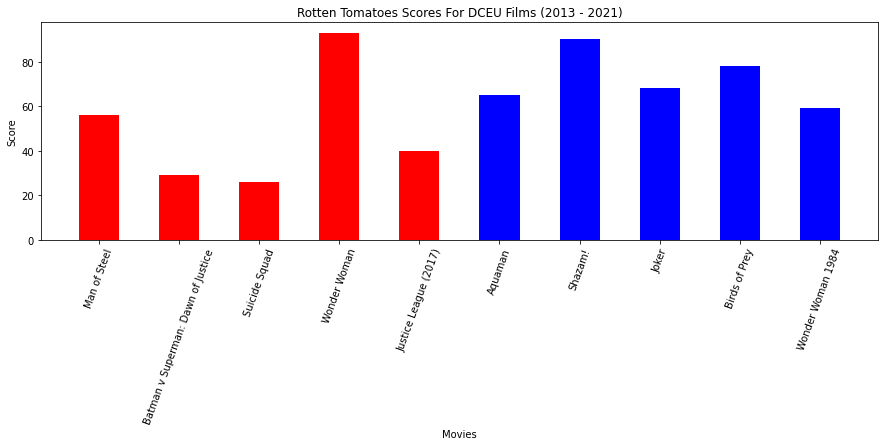

In [31]:
#for loop that will create array to assign colors to each movie based on
#whether it is Snyderverse or not
colors = []

for x in range(row_count):
    if sv[x] == 'No':
        colors.append('blue')
    else:
        colors.append('red')

plt.figure(figsize=(15,4))
plt.bar(movies, rt, color=colors, width=0.5)
plt.title("Rotten Tomatoes Scores For DCEU Films (2013 - 2021)")
plt.xlabel("Movies")
plt.ylabel("Score")
plt.xticks(rotation=70, horizontalalignment="center")
plt.show()

We get a general view of the Rotten Tomatoes scores on the bar plot above. We can already see that that post Snyderverse DC films were getting more positive critical reception than Snyderverse movies. But let's take this same bar plot and see how many movies are fresh and how many movies are rotten. We will color code the critically acclaimed movies red (red tomato) and the critically panned movies green (green splat). On Rotten Tomatoes, a movie receives a "fresh" score if it has a 60% or higher. Anything under a 60% is considered "rotten".

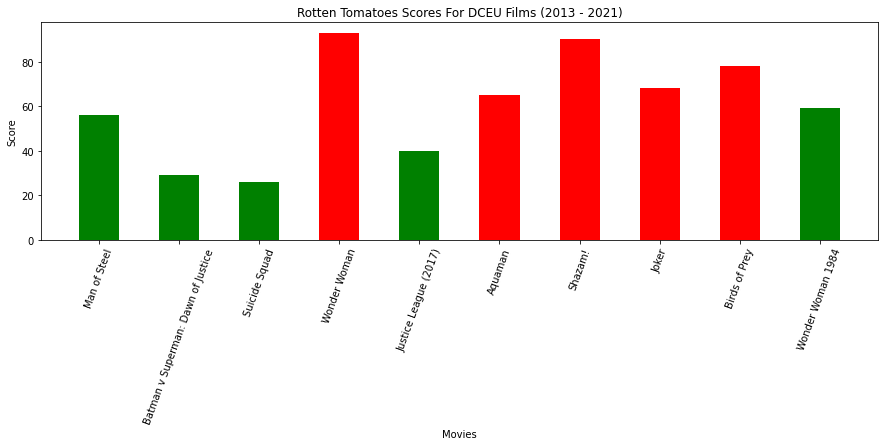

In [32]:
#for loop that will create array to assign colors to each movie based on
#whether it is "fresh" or "rotten"
colors = []

for x in range(row_count):
    if rt[x] >= 60:
        colors.append('red')
    else:
        colors.append('green')

plt.figure(figsize=(15,4))
plt.bar(movies, rt, color=colors, width=0.5)
plt.title("Rotten Tomatoes Scores For DCEU Films (2013 - 2021)")
plt.xlabel("Movies")
plt.ylabel("Score")
plt.xticks(rotation=70, horizontalalignment="center")
plt.show()

When we look at this graph we really see that the two eras of the DC films universe are quite literally flipped in terms of amount of fresh and rotten movies. The Snyderverse era only has one critically acclaimed movie, <b>Wonder Woman</b>, while the rest are panned. The post Snyderverse era has only one critically panned movie, <b>Wonder Woman 1984</b> while the rest are acclaimed. Now we will create a prediction model based on this data that will tell us how likely it is for a Snyderverse movie to be successful. In order to do this, we need to convert the Snyderverse array from strings ('Yes', 'No') to integers where '1' means it is a Snyderverse film and '0' means it is not a Snyderverse film.

In [33]:
#create a 2 dimensional array that will hold converted values
sv_arr = []
for x in range(row_count):
    if sv[x] == 'No':
        sv_arr.append([0])
    else:
        sv_arr.append([1])

In [34]:
#fit a linear regression model with sv_arr as x-axis and rt as y-axis
rt_model = LinearRegression()
rt_model.fit(sv_arr, rt)

LinearRegression()

In [35]:
#intercept is predicted rotten tomatoes score when x is 0 (or when
#a movie is NOT a Snyderverse movie)
intercept = rt_model.intercept_
slope = rt_model.coef_

#determine whether intercept is "fresh" or "rotten"
if intercept >= 60:
    a = "Fresh"
else:
    a = "Rotten"

print("Intercept: ", intercept, " (",a,")")
print("Slope: ", slope)

Intercept:  72.0  ( Fresh )
Slope:  [-23.2]


So far, we have the intercept and the slope for our model. The intercept is just the predicted number for y (in this case the predicted rotten tomatoes score) when x is 0 (in this case whether it is Snyderverse or not). So our model predicted a fresh score (72%) when a movie is NOT a Snyderverse film.

The notable number here that we should pay attention to is the slope. The slope shows us the percent change in the rotten tomatoes score for every one unit we shift in terms of Snyderverse. In other words, we only have 2 kinds of values in our Snyderverse array, 1 and 0, 1 meaning Snyderverse and 0 meaning not Snyderverse. When we shift one unit, in this case from 0 to 1, or from NOT Snyderverse to Snyderverse, the rotten tomatoes score drops by 23.2%.

Now let's flip the numbers. Let's say that 1 means it is NOT a Snyderverse film and 0 means it IS a Snyderverse movie.

In [36]:
#create a 2 dimensional array that will hold converted values
sv_arr = []
for x in range(row_count):
    if sv[x] == 'No':
        sv_arr.append([1])
    else:
        sv_arr.append([0])

#fit a linear regression model with sv_arr as x-axis and rt as y-axis
rt_model = LinearRegression()
rt_model.fit(sv_arr, rt)

#intercept is predicted rotten tomatoes score when x is 0 (or when
#a movie IS a Snyderverse movie)
intercept = rt_model.intercept_
slope = rt_model.coef_

#determine whether intercept is "fresh" or "rotten"
if intercept >= 60:
    a = "Fresh"
else:
    a = "Rotten"

print("Intercept: ", intercept, " (",a,")")
print("Slope: ", slope)

Intercept:  48.8  ( Rotten )
Slope:  [23.2]


As we can see from the data above, the intercept is different. Remember we switched the values for 1 and 0. 0 now means the movie IS a Snyderverse movie and 1 means it is NOT a Snyderverse movie. The model predicted a 48.8% rotten score when a movie IS a Snyderverse movie.

So based on the last two linear regression models, a Snyderverse movie is more likely to be critically panned by the audience. Now of course this isn't a 100% accurate prediction. There are a million other factors that play into this, but for our intents and purposes, we will continue working with the data we have here.

But critical reception is not the be-all end-all. We need to take Box Office numbers into account. We will now create a plotted line graph for the worldwide box office numbers per film.

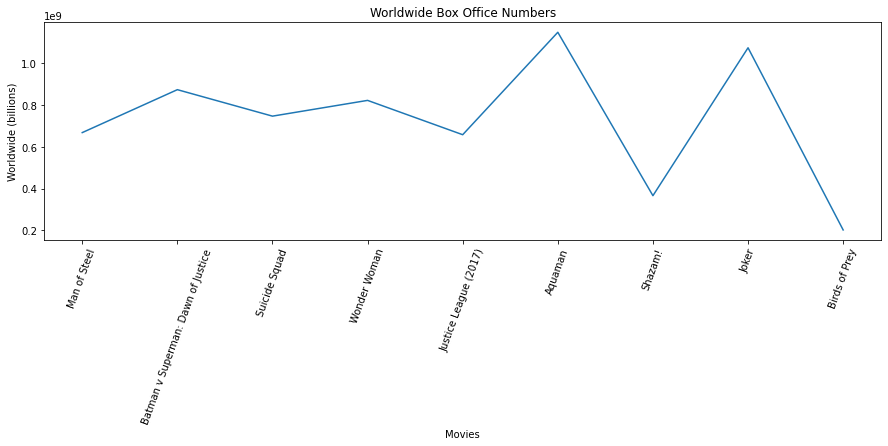

In [37]:
plt.figure(figsize=(15,4))

#Exclude WW1984 due to it not getting a traditional theatrical release
plt.plot(movies[movies != 'Wonder Woman 1984'], ww[movies != 'Wonder Woman 1984'])

plt.title("Worldwide Box Office Numbers")
plt.xlabel("Movies")
plt.ylabel("Worldwide (billions)")
plt.xticks(rotation=70, horizontalalignment="center")
plt.show()

In [38]:
#find the average box office total for each era
count_snyder = 0  #holds the number of snyderverse films being counted
count_other = 0   #holds the number of non snyderverse films being counted

tot_snyder = 0    #holds the box office total for snyderverse films
tot_other = 0     #holds the box office total for non snyderverse films

for x in range(row_count):
    if movies[x] != 'Wonder Woman 1984':
        if sv[x] == 'Yes':
            tot_snyder = tot_snyder + ww[x]
            count_snyder = count_snyder + 1
        elif sv[x] == 'No':
            tot_other = tot_other + ww[x]
            count_other = count_other + 1

#calculate the average
avg_snyder = tot_snyder/count_snyder
avg_other = tot_other/count_other

print('Average Box Office Totals')
print('Snyderverse: ', avg_snyder)
print('Non Snyderverse: ', avg_other)

Average Box Office Totals
Snyderverse:  777708361.25
Non Snyderverse:  697641828.5


From the plot graph above, we see somewhat of a different narrative being told than the previous graphs. The box office totals seem to go on a downward trajectory in the non Snyderverse era of DC films. The average worldwide box office total for Snyderverse movies is also higher by about \\$80 million. One can fairly say, however, that characters like Batman, Superman, and Wonder Woman are much more popular and well known than characters like Shazam and the Birds of Prey, but let us create another linear regression model with these numbers and see what it tells us.

In [39]:
#create a 2 dimensional array that will hold converted values
sv_arr = []
for x in range(row_count):
    if sv[x] == 'No':
        sv_arr.append([1])
    else:
        sv_arr.append([0])

#Create a linear regreassion model for worldwide box office
ww_model = LinearRegression()
ww_model.fit(sv_arr, ww)

LinearRegression()

In [40]:
intercept = ww_model.intercept_
slope = ww_model.coef_

# (Remember, 0 means it IS a Snyderverse film and 1 means it is not)
print('Intercept: ', intercept)
print('Slope: ', slope)

Intercept:  753752086.4
Slope:  [-1.95638624e+08]


In [41]:
#calculate prediction using y=mx+b
snyderverse_ww = (slope * 0) + intercept
other_ww = (slope * 1) + intercept

print('World Wide Box Office Predictions')
print('Snyderverse: ', snyderverse_ww)
print('Non Snyderverse: ', other_ww)

World Wide Box Office Predictions
Snyderverse:  [7.53752086e+08]
Non Snyderverse:  [5.58113463e+08]


Based on this model, we get a prediciton of about a \\$750 million worldwide box office for a film that IS a Snyderverse movie and \\$560 million worldwide box office for a film that is NOT a Snyderverse movie. Again, this is far different than the results we got from our previous prediction model, which shined a bright light on non Snyderverse movies. This model shows us that more money was being made during the Snyderverse era, despite the two individual movies that made more money overall being in the non Snyderverse era of films.

So should Warner Bros. move on from the Snyderverse? When we analyze this data, this could go either way. The company has made, on average, more money when Snyder was in charge of the DC Films, however, there are some astericks. Snyder was allowed to work with the biggest comic book characters in history (Superman, Batman, and Wonder Woman) which are bigger box office draws than Shazam and the Birds of Prey, relatively unknown characters. Furthermore, Warner Bros. has had more critical success and made better movies when they distanced themselves from the Snyderverse.

We can compare this situation to Paramount's Transformers franchise. While they did make a lot of money on those films, they were critically panned all around and the Transformers' reputation was now seen as poor quality. Eventually, they stopped making money too.

So the question we are asking is: should Warner Bros. move on from the Snyderverse? Based on our findings it is an obvious yes. While the Snyderverse movies did make more money on average, they were not welcomed by the general audience or critics alike. Ever since the company has moved on from the Snyderverse, they have enjoyed critical success and have made two \\$1 billion movies. Yes, while their other films haven't made as much as they could have, they are rebuilding their reputation and setting themselves up for a bigger success in the future. Warner Bros. is on the right path.